In [843]:
# import import_ipynb
# from SaMM_simulator import *

In [18]:
import collections
import colorama
from colorama import Fore
from texttable import Texttable
import random, string

In [19]:
processes = []

In [20]:
class SaMM():
    
    def __init__(self, memory_size, processes):
        self.memory = [0 for i in range(memory_size)]
        self.free_mem = [[0,len(self.memory)-1]]
        self.allocated_memory = dict()
        self.processes =processes.copy()

    def allocate_process(self,p):
        temp =[]
        flag = False
        name = p[0]
        process_len = p[1]
        for fm in self.free_mem:
            if (fm[1]-fm[0]+1)>= process_len:
                self.allocated_memory[name] = (fm[0],fm[0]+process_len-1)
                for s in range(fm[0],fm[0]+process_len):
                    self.memory[s]=name
                if (fm[1]-fm[0]+1)==process_len:
                    temp.append(fm)
                    flag = True
                    break
                fm[0]=fm[0]+process_len
                flag = True
                break
                
#         for i in temp:
#             self.free_mem.remove(i) 
        
        if flag:
            return True
        return False
    
    def process_allocation(self):
        temp=[]
        process_count = len(self.processes)
        for process in self.processes:
            if self.allocate_process(process):
                temp.append(process)
        for i in temp:
            self.processes.remove(i)

        #print=============    
        print(len(temp)," process(es) out of ",process_count," are allocated into the memory successfully\n")
        print("Current process queue:")
        if len(self.processes)==0:
            print("Process queue is empty (All processes are allocated)")
        else:
            for process in self.processes:
                print(process, end=" ")
        print("\n")
        #==================
        
    def get_memory_status(self):
        print("Current process queue:")
        if len(self.processes)==0:
            print("Process queue is empty (All processes are allocated)")
        else:
            for process in self.processes:
                print(process, end=" ")
        print("\n")
        
        print("Memory:")
        print("|", end="")
        for i in self.memory:
            print(i,"|",end="")
        print("\n")

        print("Allocated memory: ")
        print("Process ID\t","Start index\t","End index\t","Size")
        for p in self.allocated_memory:
            size = self.allocated_memory[p][1]-self.allocated_memory[p][0]+1
            print(p,"\t\t",self.allocated_memory[p][0],"\t\t",self.allocated_memory[p][1],"\t\t",size,"K")
        print("\n")

        print("Free memory: ")
        print("Start index\t","End index")
        for fm in self.free_mem:
            size = fm[1]-fm[0]+1
            print(fm[0],"\t\t",fm[1],"\t\t",size,"K")
    
    
    def deallocate_process(self,p):
        if self.allocated_memory.get(p):
            start, end = self.allocated_memory[p]
            for i,fm in enumerate(self.free_mem):
                if end <= fm[0]:
                    self.free_mem.insert(i,[start, end])
                    break
            for i in range(start,end+1):
                self.memory[i]=0     
            del self.allocated_memory[p]
            self.adjust_free_memory()
            print("Process: ",p," is deallocated successfully")
        else:
            print("Process: ",p," does not exist")

    
    def adjust_free_memory(self):
        temp = []
        if len(self.free_mem)>1:
            prev_start,prev_end = self.free_mem[0]
            for fm in range(1,len(self.free_mem)):
                if self.free_mem[fm][0]-1 == prev_end:
                    temp.append(self.free_mem[fm-1])
                    self.free_mem[fm][0]=prev_start
                prev_start = self.free_mem[fm][0]
                prev_end = self.free_mem[fm][1]
        for i in temp:
            self.free_mem.remove(i)
        
    
    def shift_memory(self,strt_idx, no_ele, shft_idx):
        for i in range(no_ele):
            self.memory[strt_idx+i], self.memory[shft_idx+i] = self.memory[shft_idx+i], self.memory[strt_idx+i]

        
    def defragment(self):
        fm_start,fm_end = self.free_mem[0]
        for p in self.allocated_memory:
            p_start, p_end = self.allocated_memory[p]
            p_len = p_end - p_start + 1
            if p_start-1 > 0 and self.memory[p_start-1]==0:
                self.shift_memory(p_start, p_len, fm_start)
                self.allocated_memory[p] = (fm_start, fm_start + p_len - 1)
                fm_start = fm_start + p_len
        self.free_mem.clear()
        self.free_mem.append([fm_start,len(self.memory)-1])   
        
        print("Defragmentation is performed successfully...!\n")
        print("Continuous free space created: ",len(self.memory)-fm_start+1)
    

In [21]:
class SaMM_performance(SaMM):
    def __init__(self, memory_size, processes):
        super().__init__(memory_size, processes)
    
    def total_free_memory(self):
        total = 0
        for fm in self.free_mem:
            total += fm[1]-fm[0]+1
        return total
        
    def mem_allocation_defrag(self):
        temp=[]
        process_count = len(self.processes)
        for process in self.processes:
            if self.allocate_process(process):
                temp.append(process)
            elif self.total_free_memory() >= process[1]:
                self.defragment()
                if self.allocate_process(process):
                    temp.append(process)
        for i in temp:
            self.processes.remove(i)

        #print=============    
        print(len(temp)," process(es) out of ",process_count," are allocated into the memory successfully\n")
        print("Current process queue:")
        if len(self.processes)==0:
            print("Process queue is empty (All processes are allocated)")
        else:
            for process in self.processes:
                print(process, end=" ")
        print("\n")
        #==================
    

In [22]:
def input_processes(n):  

    PID_exist =set()

    def generate_process():
        # generate random process ID
        PID=random.randint(1000,9999)
        PID = "P"+str(PID)
        while PID in PID_exist:
            PID=random.randint(1000,9999)
            PID = "P"+str(PID)
        PID_exist.add(PID)
        # generate random process length
        PLEN=random.randint(4,30)
        return PID,PLEN
    
    for i in range(n):
        PID,PLEN =generate_process()
        processes.append((PID,PLEN))
        
    print("New created processes:")
    print("Process ID\t","Process length")
    for p in processes:
        print(p[0],"\t\t",p[1])

In [23]:
N=5

In [34]:
input_processes(100)

## 1. without defragmentation

In [25]:
without_defrag = SaMM_performance(128, processes)

In [26]:
without_defrag.get_memory_status()

Current process queue:
('P7088', 6) ('P5859', 29) ('P7266', 28) ('P7359', 14) ('P1218', 13) ('P3436', 11) ('P4812', 25) ('P4177', 22) ('P1418', 21) ('P9526', 7) ('P3524', 14) ('P7695', 22) ('P5042', 12) ('P7775', 7) ('P9341', 28) ('P2887', 14) ('P9673', 23) ('P9345', 18) ('P3463', 5) ('P4714', 9) ('P8177', 6) ('P8211', 26) ('P8514', 12) ('P9157', 11) ('P1581', 17) ('P3007', 12) ('P7410', 4) ('P1093', 28) ('P9537', 18) ('P9468', 14) ('P1562', 9) ('P8365', 21) ('P9404', 28) ('P8795', 28) ('P8282', 26) ('P2897', 15) ('P4449', 17) ('P7962', 28) ('P7725', 10) ('P5927', 26) ('P6494', 16) ('P8939', 26) ('P2930', 30) ('P4888', 8) ('P5484', 26) ('P3790', 22) ('P5894', 12) ('P2368', 21) ('P5892', 8) ('P9263', 4) ('P2184', 16) ('P3518', 22) ('P3541', 25) ('P6437', 16) ('P8435', 14) ('P5129', 11) ('P6838', 27) ('P6577', 30) ('P1446', 30) ('P2252', 6) ('P7100', 19) ('P4742', 9) ('P7325', 8) ('P9147', 5) ('P7641', 6) ('P5735', 9) ('P8926', 22) ('P5870', 9) ('P7922', 9) ('P7415', 7) ('P9865', 23) ('P

In [27]:
iterations_without_defrag=1
without_defrag.process_allocation()
while without_defrag.processes:
    iterations_without_defrag+=1
    
    
    
    for i in range(N): # deallocating N random process from the memory
        if not without_defrag.allocated_memory:
            break
        p = random.randint(0,len(without_defrag.allocated_memory)-1)
        without_defrag.deallocate_process(list(without_defrag.allocated_memory.keys())[p])
        
    without_defrag.process_allocation()

7  process(es) out of  100  are allocated into the memory successfully

Current process queue:
('P4177', 22) ('P1418', 21) ('P9526', 7) ('P3524', 14) ('P7695', 22) ('P5042', 12) ('P7775', 7) ('P9341', 28) ('P2887', 14) ('P9673', 23) ('P9345', 18) ('P3463', 5) ('P4714', 9) ('P8177', 6) ('P8211', 26) ('P8514', 12) ('P9157', 11) ('P1581', 17) ('P3007', 12) ('P7410', 4) ('P1093', 28) ('P9537', 18) ('P9468', 14) ('P1562', 9) ('P8365', 21) ('P9404', 28) ('P8795', 28) ('P8282', 26) ('P2897', 15) ('P4449', 17) ('P7962', 28) ('P7725', 10) ('P5927', 26) ('P6494', 16) ('P8939', 26) ('P2930', 30) ('P4888', 8) ('P5484', 26) ('P3790', 22) ('P5894', 12) ('P2368', 21) ('P5892', 8) ('P9263', 4) ('P2184', 16) ('P3518', 22) ('P3541', 25) ('P6437', 16) ('P8435', 14) ('P5129', 11) ('P6838', 27) ('P6577', 30) ('P1446', 30) ('P2252', 6) ('P7100', 19) ('P4742', 9) ('P7325', 8) ('P9147', 5) ('P7641', 6) ('P5735', 9) ('P8926', 22) ('P5870', 9) ('P7922', 9) ('P7415', 7) ('P9865', 23) ('P8537', 23) ('P1239', 21) 

In [28]:
print(iterations_without_defrag)

21


## 2. With defragmetation

In [29]:
with_defrag = SaMM_performance(128, processes)

In [30]:
with_defrag.get_memory_status()

Current process queue:
('P7088', 6) ('P5859', 29) ('P7266', 28) ('P7359', 14) ('P1218', 13) ('P3436', 11) ('P4812', 25) ('P4177', 22) ('P1418', 21) ('P9526', 7) ('P3524', 14) ('P7695', 22) ('P5042', 12) ('P7775', 7) ('P9341', 28) ('P2887', 14) ('P9673', 23) ('P9345', 18) ('P3463', 5) ('P4714', 9) ('P8177', 6) ('P8211', 26) ('P8514', 12) ('P9157', 11) ('P1581', 17) ('P3007', 12) ('P7410', 4) ('P1093', 28) ('P9537', 18) ('P9468', 14) ('P1562', 9) ('P8365', 21) ('P9404', 28) ('P8795', 28) ('P8282', 26) ('P2897', 15) ('P4449', 17) ('P7962', 28) ('P7725', 10) ('P5927', 26) ('P6494', 16) ('P8939', 26) ('P2930', 30) ('P4888', 8) ('P5484', 26) ('P3790', 22) ('P5894', 12) ('P2368', 21) ('P5892', 8) ('P9263', 4) ('P2184', 16) ('P3518', 22) ('P3541', 25) ('P6437', 16) ('P8435', 14) ('P5129', 11) ('P6838', 27) ('P6577', 30) ('P1446', 30) ('P2252', 6) ('P7100', 19) ('P4742', 9) ('P7325', 8) ('P9147', 5) ('P7641', 6) ('P5735', 9) ('P8926', 22) ('P5870', 9) ('P7922', 9) ('P7415', 7) ('P9865', 23) ('P

In [35]:
iterations_with_defrag=1
with_defrag.mem_allocation_defrag()
while with_defrag.processes:
    iterations_with_defrag+=1
    
    with_defrag.get_memory_status()
    
    for i in range(N): # deallocating N random process from the memory
        if not with_defrag.allocated_memory:
            break
        p = random.randint(0,len(with_defrag.allocated_memory)-1)
        with_defrag.deallocate_process(list(with_defrag.allocated_memory.keys())[p])
    with_defrag.mem_allocation_defrag()

In [32]:
print(iterations_with_defrag)

10


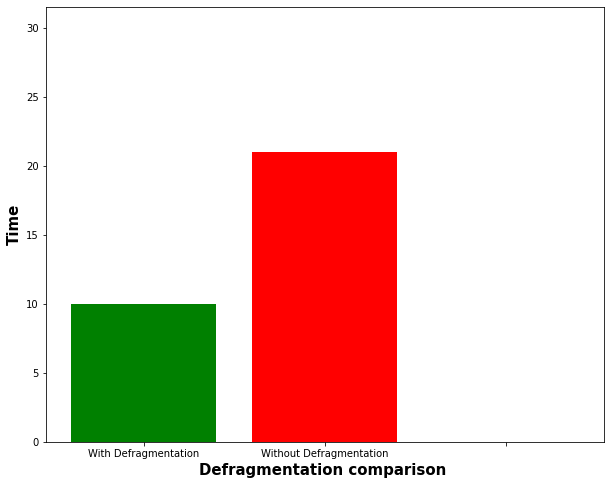

In [36]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
# height = [Time_with_defrag, Time_without_defrag]
fig = plt.subplots(figsize =(10, 8))

height = [iterations_with_defrag,iterations_without_defrag,30]
bars = ('With Defragmentation','Without Defragmentation','')
x_pos = np.arange(len(bars))

# Create bars with different colors
plt.bar(x_pos, height, color=['green','red','white'])

# Create names on the x-axis
plt.xticks(x_pos, bars)

plt.xlabel('Defragmentation comparison ', fontweight ='bold', fontsize = 15)
plt.ylabel('Time', fontweight ='bold', fontsize = 15)

# Show graph
plt.show()